In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
class DVBS2X:
    def __init__(self, num_symbols, samples_per_symbol, carrier_freq):
        self.num_symbols = num_symbols
        self.samples_per_symbol = samples_per_symbol
        self.carrier_freq = carrier_freq

    def generate_bpsk_symbols(self):
        bits = np.random.randint(0, 2, self.num_symbols)
        symbols = 2 * bits - 1  
        return symbols, bits

    def generate_qpsk_symbols(self):
        bits = np.random.randint(0, 4, self.num_symbols)
        symbols = np.exp(1j * (np.pi / 4) * (2 * bits + 1))
        return symbols, bits

    def generate_signal(self, symbols):

        signal = np.repeat(symbols, self.samples_per_symbol)

        t = np.arange(len(signal)) / (self.carrier_freq * self.samples_per_symbol)

        modulated_signal = np.real(signal * np.exp(1j * 2 * np.pi * self.carrier_freq * t))

        return t, modulated_signal

    def plot_signal(self, t, signal, modulation_type, num_symbols_to_plot=10):
        samples_to_plot = num_symbols_to_plot * self.samples_per_symbol
        
        plt.figure(figsize=(12, 6))
        plt.plot(t[:samples_to_plot], signal[:samples_to_plot])
        plt.title(f'{modulation_type} Modulated Signal (Zoomed-in on {num_symbols_to_plot} symbols)')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.show()

    def plot_constellation(self, symbols, modulation_type):
        """General plot function for the constellation diagram."""
        plt.figure(figsize=(6, 6))
        plt.scatter(symbols.real, symbols.imag, c='r')
        plt.title(f'{modulation_type} Constellation Diagram')
        plt.xlabel('In-phase')
        plt.ylabel('Quadrature')
        plt.grid(True)
        plt.axis('equal')
        plt.show()

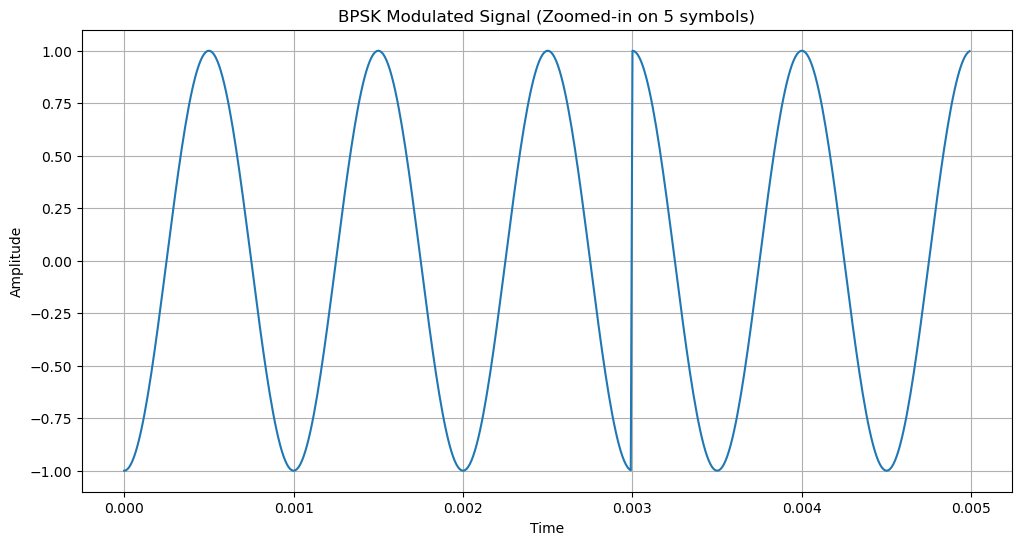

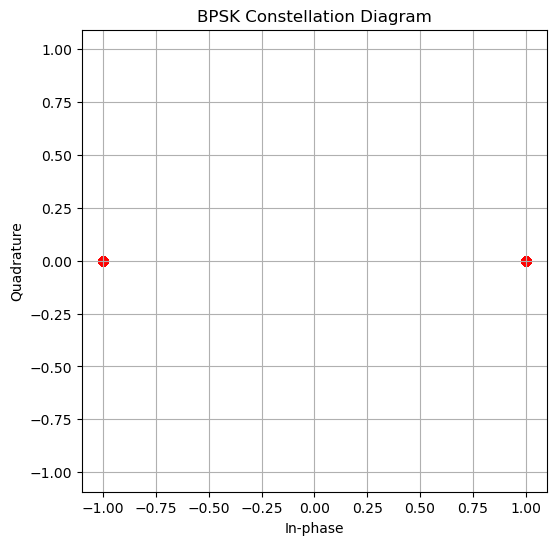

In [28]:
num_symbols = 1000
samples_per_symbol = 100  # Higher resolution for better signal visualization
carrier_freq = 1000  # Hz

# Create an instance of DVBS2X
modulator = DVBS2X(num_symbols, samples_per_symbol, carrier_freq)

# BPSK Modulation
qpsk_symbols, q = modulator.generate_qpsk_symbols()
t_qpsk, qpsk_signal = modulator.generate_signal(bpsk_symbols)
modulator.plot_signal(t_bpsk, bpsk_signal, modulation_type="QPSK", num_symbols_to_plot=5)
modulator.plot_constellation(bpsk_symbols, modulation_type="QPSK")
